In [1]:
import geopandas
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import shape
import seaborn as sns
from splot.mapping import vba_choropleth


In [2]:
import os
#os.chdir('/Users/juliandiaz/Box/final_python figures')

os.chdir(r"C:\Users\juliand3\Box\final_python figures")

In [3]:
#mac
#data_dir="/Users/juliandiaz/Box/ACE 592-Python project/project data/climate/"
#geo_dir="/Users/juliandiaz/Box/ACE 592-Python project/project data/geo data/"
#landval_dir="/Users/juliandiaz/Box/ACE 592-Python project/project data/land value/"

#windows
data_dir=r"C:\Users\juliand3\Box\ACE 592-Python project\project data\climate/"
geo_dir=r"C:\Users\juliand3\Box\ACE 592-Python project\project data\geo data/"
landval_dir=r"C:\Users\juliand3\Box\ACE 592-Python project\project data\land value/"

# 1-Upload SO2, NO2 and Landvalue data

In [4]:
##S02 data##

so2=pd.read_csv(data_dir+"df_s02_1997_2012.csv")
so2_w=so2.pivot(index='fips', columns='year', values='s02').reset_index()
so2_w=so2_w.add_prefix('s02_')
so2_w=so2_w.rename(columns={'s02_fips':'fips'})
so2_w['so2_pctchange_9712']=((so2_w['s02_2012']/so2_w['s02_1997'])-1)*100
so2_w

year,fips,s02_1997,s02_2002,s02_2007,s02_2012,so2_pctchange_9712
0,1001,3.046654,2.734708,2.630414,1.230376,-59.615513
1,1003,4.478397,1.898672,2.950815,1.554161,-65.296499
2,1005,3.597387,2.729062,2.734729,1.312831,-63.505998
3,1007,3.769424,2.946329,2.802577,1.340489,-64.437837
4,1009,4.754876,3.732725,3.500719,1.492130,-68.618948
...,...,...,...,...,...,...
3084,56037,1.667345,3.812633,1.113337,0.774746,-53.534147
3085,56039,4.659226,4.293190,1.717680,1.280853,-72.509311
3086,56041,1.770055,3.644637,1.318446,0.923979,-47.799407
3087,56043,3.479146,3.113114,1.925359,1.340663,-61.465759


In [5]:
##NO2 data##
no2=pd.read_csv(data_dir+"df_n02_1997_2012.csv")
no2_w=no2.pivot(index='fips', columns='year', values='n02').reset_index()
no2_w=no2_w.add_prefix('n02_')
no2_w=no2_w.rename(columns={'n02_fips':'fips'})
no2_w['no2_pctchange_9712']=((no2_w['n02_2012']/no2_w['n02_1997'])-1)*100


In [6]:
##land value data##

lval=pd.read_csv(landval_dir+"land_df.csv")
#lval=lval.drop(columns=['cropland_acre', 'state', 'county'])
lval_w=lval.pivot(index=['fips'], columns='year', values='landvalue_acre').reset_index()
lval_w=lval_w.add_prefix('lvalacre_')
lval_w=lval_w.rename(columns={'lvalacre_fips':'fips'})
lval_w['lval_pctchange_9712']=((lval_w['lvalacre_2012']/lval_w['lvalacre_1997'])-1)*100

lval_w


year,fips,lvalacre_1997,lvalacre_2002,lvalacre_2007,lvalacre_2012,lval_pctchange_9712
0,1001,2182.432432,2829.819277,2545.098039,2697.756789,23.612385
1,1003,4298.986486,3768.072289,4274.509804,4698.937426,9.303377
2,1005,1648.648649,1802.710843,2301.960784,2669.421488,61.915730
3,1007,2550.675676,2578.313253,2933.333333,2476.977568,-2.889356
4,1009,3793.918919,3849.397590,4184.313725,4288.075561,13.024966
...,...,...,...,...,...,...
3115,56037,150.337838,147.590361,233.986928,238.488784,58.635236
3116,56039,1579.391892,4603.915663,2385.620915,3755.608028,137.788230
3117,56041,420.608108,561.746988,768.627451,867.768595,106.312855
3118,56043,763.513514,585.843373,745.098039,1048.406139,37.313370


In [7]:
#read geography file for counties in the US#
counties=geopandas.read_file(geo_dir+"us_counties.json")
counties['fips']=counties['id'].astype(int)

In [8]:
counties

,id,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA,geometry,fips
0,01001,0500000US01001,01,001,Autauga,County,594.436,"POLYGON ((-86.49680 32.34440, -86.71790 32.402...",1001
1,01009,0500000US01009,01,009,Blount,County,644.776,"POLYGON ((-86.57780 33.76530, -86.75910 33.840...",1009
2,01017,0500000US01017,01,017,Chambers,County,596.531,"POLYGON ((-85.18410 32.87050, -85.12340 32.772...",1017
3,01021,0500000US01021,01,021,Chilton,County,692.854,"POLYGON ((-86.51730 33.02060, -86.51600 32.929...",1021
4,01033,0500000US01033,01,033,Colbert,County,592.619,"POLYGON ((-88.14000 34.58170, -88.13920 34.587...",1033
...,...,...,...,...,...,...,...,...,...
3216,51001,0500000US51001,51,001,Accomack,County,449.496,"MULTIPOLYGON (((-75.24230 38.02720, -75.29690 ...",51001
3217,51021,0500000US51021,51,021,Bland,County,357.725,"POLYGON ((-81.22510 37.23490, -81.20480 37.243...",51021
3218,51027,0500000US51027,51,027,Buchanan,County,502.763,"POLYGON ((-81.96830 37.53780, -81.92790 37.512...",51027
3219,51037,0500000US51037,51,037,Charlotte,County,475.271,"POLYGON ((-78.44330 37.07940, -78.49300 36.891...",51037


# 2- Stats

In [9]:
y_so2=so2.groupby('year')['s02'].mean().reset_index()
y_no2=no2.groupby('year')['n02'].mean().reset_index()
y_lval=lval.groupby('year')['landvalue_acre'].mean().reset_index()

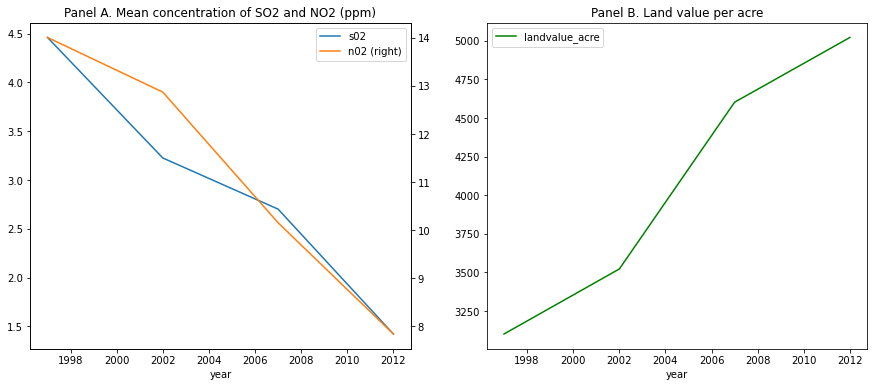

In [10]:
fig, (ax1, ax2)=plt.subplots(1,2, figsize=(15,6))
y_so2.plot(kind='line', x='year', y='s02', ax=ax1)
y_no2.plot(kind='line', x='year',y='n02',ax=ax1, secondary_y=True);
y_lval.plot(kind='line', x='year', y='landvalue_acre', ax=ax2, color='green');

ax1.set_title('Panel A. Mean concentration of SO2 and NO2 (ppm)');
ax2.set_title('Panel B. Land value per acre');
plt.savefig('trends_cont_lval.png')

In [21]:
y_lval

,year,landvalue_acre
0,1997,3101.502300
1,2002,3522.359195
2,2007,4602.417832
3,2012,5021.573363


In [11]:
##Merge all dataframes into the data containing geography 

cont_lv=counties
cont_lv=pd.merge(cont_lv, so2_w, how='left', on='fips')
cont_lv=pd.merge(cont_lv, no2_w, how='left', on='fips')
cont_lv=pd.merge(cont_lv, lval_w, how='left', on='fips')


In [12]:
cont_lv_proj=cont_lv.to_crs(epsg=4087)
cont_lv_proj=cont_lv_proj[~cont_lv_proj['STATE'].isin(['15', '02', '72'])]

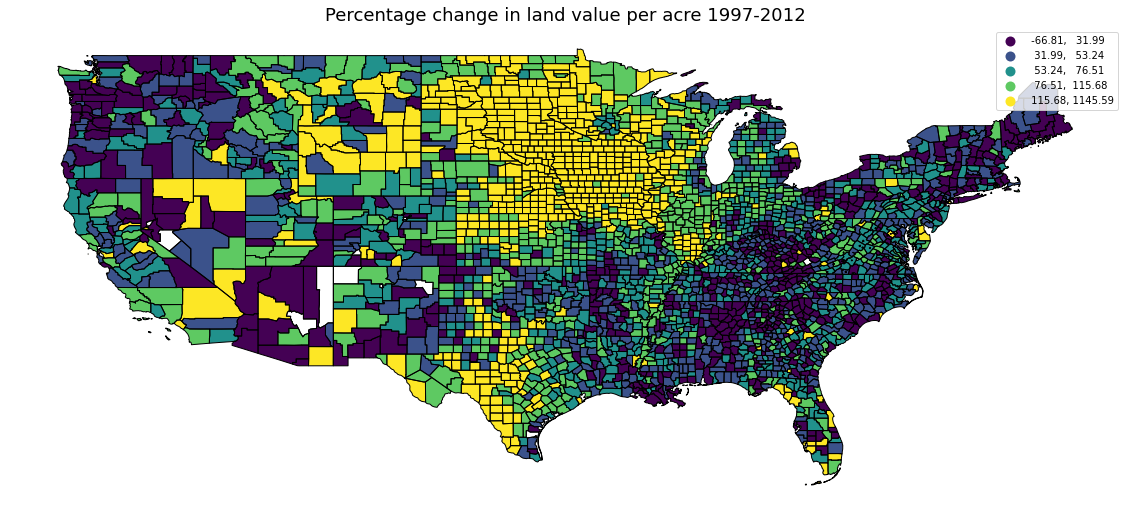

In [13]:
f, a=plt.subplots(figsize=(20,10))
cont_lv_proj.plot(column='lval_pctchange_9712',
                 ax=a, scheme='quantiles', legend=True)

cont_lv_proj.plot(ax=a, facecolor='none', edgecolor='black')
plt.title("Percentage change in land value per acre 1997-2012",fontsize=18)
plt.axis('off');

plt.savefig('lval_pctchange_9712.png')

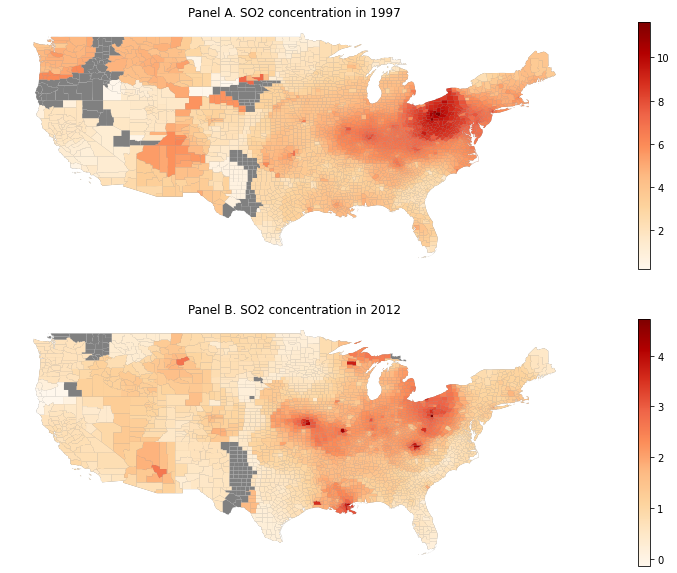

In [14]:
f, (ax1,ax2)=plt.subplots(2,1, figsize=(20,10))

cont_lv_proj.plot(ax=ax1, facecolor='grey', edgecolor='none')
cont_lv_proj.plot(ax=ax2, facecolor='grey', edgecolor='none')

cont_lv_proj.plot(column='s02_1997',  cmap="OrRd",
                 ax=ax1,  legend=True)


cont_lv_proj.plot(column='s02_2012',  cmap="OrRd",
                 ax=ax2,  legend=True)

ax1.set_title('Panel A. SO2 concentration in 1997')
ax2.set_title('Panel B. SO2 concentration in 2012')

ax1.axis('off');
ax2.axis('off');

plt.savefig('so2_concent.png')


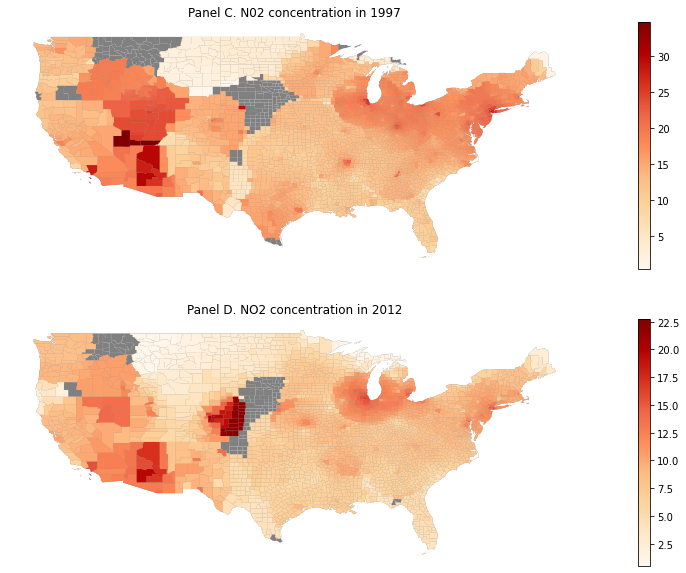

In [15]:
f, (ax1,ax2)=plt.subplots(2,1, figsize=(20,10))
cont_lv_proj.plot(ax=ax1, facecolor='grey', edgecolor='none')
cont_lv_proj.plot(ax=ax2, facecolor='grey', edgecolor='none')

cont_lv_proj.plot(column='n02_1997', cmap="OrRd",
                 ax=ax1,  legend=True)

cont_lv_proj.plot(column='n02_2012',cmap="OrRd",
                 ax=ax2,  legend=True)

ax1.axis('off');
ax2.axis('off');


ax1.set_title('Panel C. N02 concentration in 1997')
ax2.set_title('Panel D. NO2 concentration in 2012')

plt.savefig('no2_concent.png')



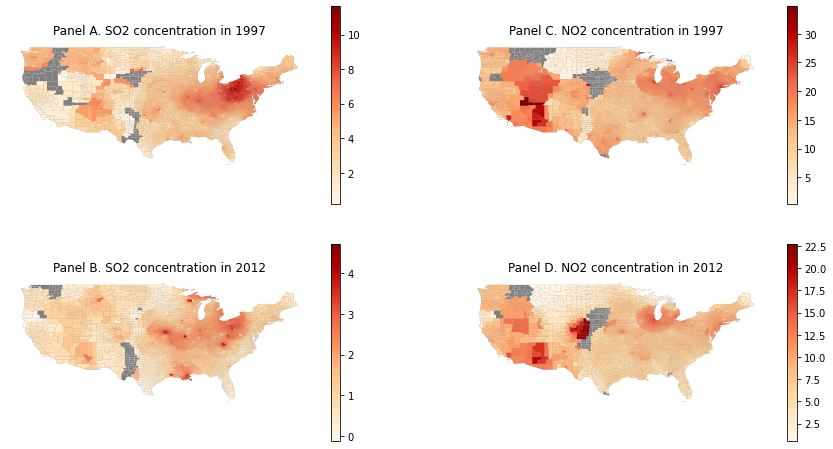

In [16]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(
                                    ncols=2,
                                    nrows=2,
                                    figsize=(15,8))

cont_lv_proj.plot(ax=ax1, facecolor='grey', edgecolor='none')
cont_lv_proj.plot(ax=ax2, facecolor='grey', edgecolor='none')
cont_lv_proj.plot(ax=ax3, facecolor='grey', edgecolor='none')
cont_lv_proj.plot(ax=ax4, facecolor='grey', edgecolor='none')

cont_lv_proj.plot(column='s02_1997',  cmap="OrRd",
                 ax=ax1,  legend=True, legend_kwds={'orientation': 'vertical'})


cont_lv_proj.plot(column='s02_2012',  cmap="OrRd", legend_kwds={'orientation': 'vertical'},
                 ax=ax3,  legend=True)

cont_lv_proj.plot(column='n02_1997',  cmap="OrRd",legend_kwds={'orientation': 'vertical'},
                 ax=ax2,  legend=True)

cont_lv_proj.plot(column='n02_2012',  cmap="OrRd", legend_kwds={'orientation': 'vertical'},
                 ax=ax4,  legend=True)


ax1.set_title('Panel A. SO2 concentration in 1997')
ax3.set_title('Panel B. SO2 concentration in 2012')
ax2.set_title('Panel C. NO2 concentration in 1997')
ax4.set_title('Panel D. NO2 concentration in 2012')

ax1.axis('off');
ax2.axis('off');
ax3.axis('off');
ax4.axis('off');

plt.savefig('so2_no2_9712.png')

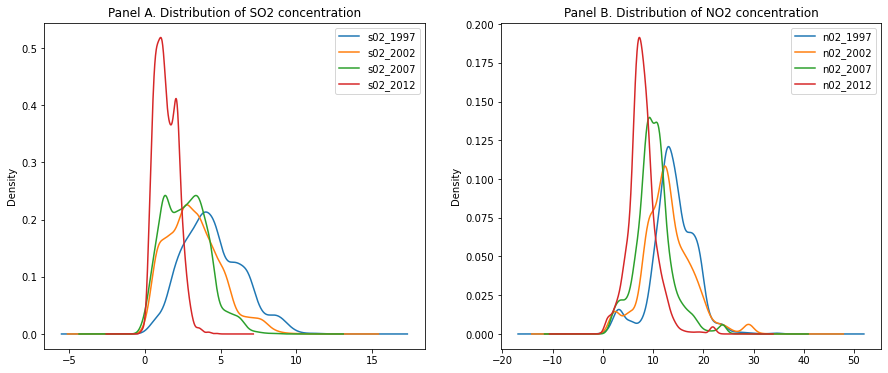

In [17]:

f, (ax1,ax2)=plt.subplots(1,2, figsize=(15,6))

cont_lv_proj[['s02_1997','s02_2002','s02_2007', 's02_2012']].plot.kde(ax=ax1)
cont_lv_proj[['n02_1997','n02_2002','n02_2007', 'n02_2012']].plot.kde(ax=ax2)

ax1.set_title('Panel A. Distribution of SO2 concentration');
ax2.set_title('Panel B. Distribution of NO2 concentration');

plt.savefig('distributions_so2_no2.png')

In [18]:
import numpy as np

In [19]:
cont_long=pd.merge(so2, no2, on=['fips', 'year'])
cont_long['l_s02']=np.log(cont_long['s02'])
cont_long['l_n02']=np.log(cont_long['n02'])
cont_long=pd.merge(cont_long, lval, on=['fips', 'year'])
cont_long['l_landvalue_acre']=np.log(cont_long['landvalue_acre'])

C:\Users\juliand3\.conda\envs\geo_env\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


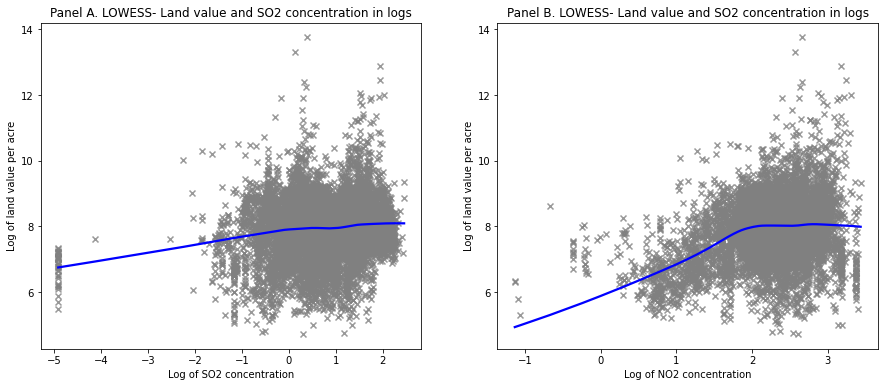

In [20]:
f, (ax1,ax2)=plt.subplots(1,2, figsize=(15,6))

sns.regplot(x="l_s02",
            y="l_landvalue_acre", line_kws={'color':'blue'}, scatter_kws={'color':'grey'}, marker='x',
             data=cont_long, lowess=True, ax=ax1)

sns.regplot(x="l_n02",
            y="l_landvalue_acre", line_kws={'color':'blue'}, scatter_kws={'color':'grey'}, marker='x',
             data=cont_long, lowess=True, ax=ax2)


ax1.set_xlabel('Log of SO2 concentration')
ax1.set_ylabel('Log of land value per acre')

ax2.set_xlabel('Log of NO2 concentration')
ax2.set_ylabel('Log of land value per acre')

ax1.set_title('Panel A. LOWESS- Land value and SO2 concentration in logs')
ax2.set_title('Panel B. LOWESS- Land value and SO2 concentration in logs')

plt.savefig('lowess_regs.png')
